## Import Libraries

In this notebook, we will use several libraries to perform data analysis and visualization. Below are the libraries we have imported:

- `matplotlib.pyplot` for plotting graphs.
- `scipy.io` for loading MATLAB files.
- `numpy` for numerical operations.
- `repasca` for performing ASCA (Analysis of Variance - Simultaneous Component Analysis).

These libraries are essential for loading the data, performing the analysis, and visualizing the results.

In [2]:
from matplotlib import pyplot as plt
import scipy.io
import numpy as np
from repasca import rep_asca

## Load Data

In this section, we will load the data from a MATLAB file using the `scipy.io` library. The data will be extracted into variables that will be used for further analysis. The key variables extracted are:

- `X`: The main data matrix.
- `design`: The design matrix.
- `X_rep`: The replicated data matrix.
- `d_rep`: The replicated design matrix.
- `klimit`: A scalar value representing the limit for the number of components.
- `lbd`: The wavelength values.

We will then use these variables to perform ASCA (Analysis of Variance - Simultaneous Component Analysis) using the `rep_asca` function from the `repasca` library.

In [3]:
data = scipy.io.loadmat('data.mat')

X = data['X']
design = data['d']
X_rep = data['X_rep']
d_rep = data['Ds']
klimit = data['klimit'][0][0] 
lbd = data['lambda']


## Launch Model RepASCA

In this section, we will launch the RepASCA model using the variables extracted from the MATLAB file. The `rep_asca` function from the `repasca` library will be used to perform the analysis. The key steps involved are:

1. Call the `rep_asca` function with the extracted variables.
2. Display the results, including explained variance, list of factor names, and L_err.
3. Plot the results to visualize the L_err against the wavelength.

The following cell contains the code to perform these steps.

In [4]:
model = rep_asca(X, design, X_rep, d_rep, klimit)

## Plot Results

In this section, we will display and plot the results obtained from the RepASCA model. The key outputs include:

- Explained Variance
- List of Factor Names
- L_err

We will also plot the L_err against the wavelength to visualize the results.

Explained Variance: [[1.08993540e-29 2.77543750e+00 1.12922713e-29 9.72245625e+01]
 [1.00661792e-29 2.77399866e+00 1.08642697e-29 9.72260013e+01]
 [1.20761488e-29 2.77402201e+00 1.15804680e-29 9.72259780e+01]
 [1.26155626e-29 2.77323967e+00 1.10571453e-29 9.72267603e+01]
 [1.09403984e-29 2.77395033e+00 1.08140900e-29 9.72260497e+01]
 [1.15965670e-29 2.77093629e+00 1.12984821e-29 9.72290637e+01]
 [1.25049914e-29 2.76629464e+00 1.11670361e-29 9.72337054e+01]
 [1.30710673e-29 2.76353241e+00 1.15525904e-29 9.72364676e+01]
 [1.70969174e-29 2.69995001e+00 1.12742215e-29 9.73000500e+01]
 [1.14740361e-29 2.73684705e+00 1.10036231e-29 9.72631529e+01]
 [3.39253537e-31 5.35529596e+00 2.34282971e-29 9.46447040e+01]]
List of Factor Names: ['XA', 'XB', 'XAB', 'XRes']
L_err: [[-0.10528237 -0.09518142 -0.08359936 ... -0.06495071  0.11918162
  -0.13157145]
 [-0.21132056 -0.20744864 -0.2017333  ...  0.06947404  0.05927514
  -0.16049637]
 [ 0.09209141  0.10255831  0.10786044 ...  0.08848877  0.1254921
  

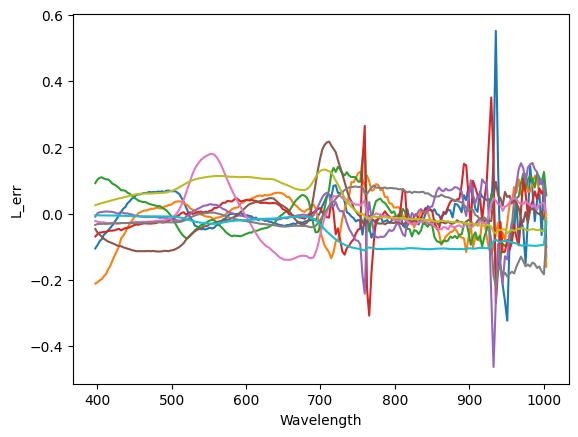

In [6]:
print("Explained Variance:", model['explained_var'])
print("List of Factor Names:", model['list_factor_name'])
print("L_err:", model['L_err'])

plt.figure()
plt.plot(lbd,model['L_err'].T)
plt.xlabel('Wavelength')
plt.ylabel('L_err')
plt.title('')
plt.show()